# Python en la vida cotidiana

## Mensajes de WhatsApp

Para este ejercicio se usó de referencia un tutorial sobre el [envío de WhatsApps desde python](https://www.analyticslane.com/2022/03/07/enviar-mensajes-de-whatsapp-con-python/).

### Instalación de paquetes

In [1]:
import pywhatkit as kit # Para enviar mensajes por WhatsApp
import sys # Para establecer las rutas de acceso

# La ruta es dentro del sistema del creador, cambiar a donde se tenga el módulo MensajesWhatsapp
sys.path.append(r'C:\Users\mapis\OneDrive\Documents\Universidad\5 - Quinto semestre\Herramientas para las ciencias de datos II\Proyecto individual\cod')

In [2]:
# Módulo creado
from MensajesWhatsapp import MensajesWhatsapp

Se manda un mensaje de prueba.

In [3]:
# Por la privacidad de la persona, no se deja un número escrito, en caso de ser de Costa Rica basta poner el número receptor pegado al codigo del país
numero = MensajesWhatsapp('+506')
numero.mensaje_instantaneo('Facilito')


## Automatización de procesos en excel

Para la realización de este ejercicio se buscó la documentación de la librería [xlsxwriter](https://xlsxwriter.readthedocs.io), la cual trae múltiples ejemplos. La idea del ejercicio es crear una clase que permita automatizar algunos de los procesos que se podrían ocupar en Excel, usando las herramientas que proporciona python.

### Instalación de paquetes

In [10]:
import xlsxwriter
import pandas as pd
import sys # Para establecer las rutas de acceso

# La ruta es dentro del sistema del creador, cambiar a donde se tenga el módulo MensajesWhatsapp
sys.path.append(r'C:\Users\mapis\OneDrive\Documents\Universidad\5 - Quinto semestre\Herramientas para las ciencias de datos II\Proyecto individual\cod')

In [11]:
from EditorExcel import EditorExcel

### Ejemplo de los métodos de la clase

Para la creación de los métodos de la clase EditorExcel se usaron bastantes ejemplos, inicialmente se buscó sobre cómo pasar un DataFrame de pandas a [este formato](https://xlsxwriter.readthedocs.io/working_with_pandas.html), con el objetivo de que cualquier persona con conocimientos sobre DataFrames en python pueda usar la clase de manera sencilla. Los métodos consisten en:
* [escribir()](https://xlsxwriter.readthedocs.io/worksheet.html), para escribir texto, números y fórmulas simples (operaciones matemáticas que no ocupen funciones propias de excel) en el Excel.
* [formula()](https://xlsxwriter.readthedocs.io/worksheet.html#worksheet-write-dynamic-array-formula) permite escribir todas las fórmulas de Excel que están disponibles en la librería, sin importar el idioma en el cual el usuario tenga la computadora o Excel, las fórmulas deben ponerse en inglés, pues así fué diseñada la librería.
* [escribir_fila()](https://xlsxwriter.readthedocs.io/worksheet.html#worksheet-write-row) se usa para pasar una lista de python a una fila de Excel.
* [escribir_columna()](https://xlsxwriter.readthedocs.io/worksheet.html#worksheet-write-column) se usa para pasar una lista de python a una columna de Excel.
* [condicional()](https://xlsxwriter.readthedocs.io/worksheet.html#worksheet-conditional-format) permite poner el fondo rojo a aquellas casillas que cumplan una condición.
* [mini_barras()](https://xlsxwriter.readthedocs.io/example_sparklines1.html#ex-sparklines1) crea un gráfico de barras pequeño, diseñado para un análisis rápido.
* [filtro()](https://xlsxwriter.readthedocs.io/worksheet.html#worksheet-autofilter) pone el formato de autofiltro en el rango seleccionado.
* [proteger()](https://xlsxwriter.readthedocs.io/worksheet.html#protect) permite proteger el documento a través de una contraseña, esto para que el usuario no pueda eliminar filas, columnas o modificar el texto (a elegir entre estas 3 opciones).
* [autoajuste()](https://xlsxwriter.readthedocs.io/worksheet.html#worksheet-autofit) autoajusta todas las columnas que tengan, al menos, una observación con datos.
* [cerrar()](https://xlsxwriter.readthedocs.io/working_with_pandas.html), para cerrar el editor de python.

Con los métodos ya explicados, se procede a hacer un ejemplo práctico simulando situaciones que podrían presentarse en el trabajo, para esto se creará un DataFrame pequeño en el cuál se aplicarán los diversos métodos implementados.

In [12]:
# Simulamos una base de empleados
base_empleados = pd.DataFrame({'Id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                              'Empleado': ["Pedro", "Luis", "Carlos", "Elena", "Francisco", "David", "Marta", "Ana", "Isabel", "Verónica"],
                              'Departamento': ["RRHH", "RRHH", "Contaduría", "Actuariado", "Actuariado", "TI", "RRHH", "TI", "Proyectos", "Secretaría"],
                              'Salario_base': [750_000, 900_000, 1_000_000, 1_050_000, 1_000_000, 900_000, 800_000, 850_000, 850_000, 650_000],
                              'Horas_extra': [0, 0, 5, 0, 2, 5, 0, 2, 12, 8],
                              'Bonus': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                              'Salario_total': [750_000, 900_000, 1_000_000, 1_050_000, 1_000_000, 900_000, 800_000, 500_000, 850_000, 650_000]})

# Creamos el Excel
empleados = EditorExcel(base_empleados, 'base_empleados.xlsx')

# Añadimos nuevos empleados
empleados.escribir_fila(lista = [11, "José", "Secretaría", 600_000, 0, 0, 600_000], formato_escritura = 'python', fila = 11, columna = 0)
empleados.escribir_fila(lista = [12, "Pablo", "TI", 800_000, 0, 0, 800_000], formato_escritura = 'excel', celda = 'A13')
empleados.escribir_fila(lista = [13, "Tatiana", "Contaduría", 900_000, 0, 0, 900_000], formato_escritura = 'excel', celda = 'A14')

# Detección de horas extra
empleados.condicional(condicion = '>', valor = 0, formato_escritura = 'excel', celdas = 'E2:E14')

# Bonus de 1% del salario por hora extra
empleados.formula(texto = '=0.01*E2:E14', formato_escritura = 'excel', celda = 'F2:F14')

# Salario total
empleados.formula(texto = '=(1 + F2:F14) * D2:D14', formato_escritura = 'python', columna_ini = 6, columna_fin = 6, fila_ini = 1, fila_fin = 13)

# Promedio del salario
empleados.formula(texto = '=AVERAGE(G2:G14)', formato_escritura = 'excel', celda = 'G15')

# Pequeño gráfico de las horas extra
empleados.mini_barras('E15', 'E2:E14')

# Protección del archivo, el usuario no podrá eliminar columnas ni modificar el formato
empleados.proteger(contraseña = 'facilito', eliminar_filas = True)

# Autoajuste de columnas
empleados.autoajuste()

# Cerramos el editor para abrir el archivo
empleados.cerrar()

# Web scraping

Para este proceso se usó como referencia un tutorial para hacer [web scraping](https://nanonets.com/blog/web-scraping-with-python-tutorial/).

### Instalación de paquetes

In [2]:
import requests # Para hacer solicitudes al sitio web
from bs4 import BeautifulSoup # Para analizar el código del HTML
import pandas as pd
import time # Para añadir un cierto delay para no sobrecargar la página con las solucitudes
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Extracción de los datos

Se inicia el proceso de extracción de datos, para esto se eligió una página web de [compra/venta de carros](https://crautos.com/autosusados/), se usará el comando [find_all](https://j2logo.com/python/web-scraping-con-python-guia-inicio-beautifulsoup/#scraping-bs-pasos) de la librería BeautifulSoup, además, se buscó la manera de hacer casting de [string a float](https://ellibrodepython.com/casting-python#:~:text=class%20%27str%27>-,Convertir%20string%20a%20float,a%20float%20usando%20float()%20.) pues se ocupará para los precios.

In [8]:
# Se selecciona el url del que se extraerá la información
url = "https://crautos.com/autosusados/"

# Manda una solicitud para obtener la información de la página web (librería requests)
respuesta = requests.get(url)

# Se analiza la información del HTML (librería BeautifulSoup)
sopa = BeautifulSoup(respuesta.content, 'html.parser')

#### Funciones necesarias

Se procede a crear las funciones para extraer cada uno de los elementos necesarios de la página web.

In [9]:
def elementos_simples(sopa_bs4, tipo, clase):
    '''
    Función que extrae los elementos que no ocupan modificaciones de un HTML

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_simple : list
        Lista con los elementos encontrados dentro del HTML correspondiente
    '''
    # Lista para guardar los elementos correspondientes
    lista_simple = []

    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in sopa_bs4.find_all(tipo, class_ = clase):
        # Se extrae el elemento y se agrega a la lista
        elemento = fila.get_text()
        lista_simple.append(elemento)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_simple

In [10]:
def elemento_anno(sopa_bs4, tipo, clase):
    '''
    Función que extrae los años de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_annos : list
        Lista con los años encontrados dentro del HTML correspondiente
    '''
    # Lista para guardar los elementos correspondientes
    lista_annos = []

    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in sopa_bs4.find_all(tipo, class_ = clase):
        # Extrae una cadena con muchos espacios, solo nos interesa el año (los primeros 4 caracteres)
        anno = fila.find('b').get_text()[ : 4]
        lista_annos.append(anno)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_annos

In [11]:
def elemento_modelos(sopa_bs4, tipo, clase):
    '''
    Función que extrae los modelos de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_modelos : list
        Lista con los modelos de carro encontrados dentro de la página web de crautos
    '''
    # Lista para guardar los elementos correspondientes
    lista_modelos = []

    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in sopa_bs4.find_all(tipo, class_ = clase):
        # Extrae toda la información detallada del carro, quita los espacios del inicio y el final, separa por guiones y guarda el primer elemento
        modelo = fila.get_text().strip().split(' - ')[0]
        lista_modelos.append(modelo)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_modelos

In [12]:
def elemento_transmision(sopa_bs4, tipo, clase):
    '''
    Función que extrae las transmisiones de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_transmisiones : list
        Lista con las transmisiones de carro encontrados dentro de la página web de crautos
    '''
    # Lista para guardar los elementos correspondientes
    lista_transmision = []

    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in sopa_bs4.find_all(tipo, class_ = clase):
        # Guardamos la fila, pues se le harán
        fila_actual = fila.get_text()
        
        # Obtenemos la transmisión
        if(fila_actual.count("Automático") > 0):
            transmision = "Automático"
        elif(fila_actual.count("Manual\r\n") > 0):
            transmision = "Manual"
        else:
            transmision = np.nan
        lista_transmision.append(transmision)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_transmision

In [13]:
def elemento_transmision(sopa_bs4, tipo, clase):
    '''
    Función que extrae las transmisiones de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_transmisiones : list
        Lista con las transmisiones de carro encontrados dentro de la página web de crautos
    '''
    # Lista para guardar los elementos correspondientes
    lista_transmision = []

    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in sopa_bs4.find_all(tipo, class_ = clase):
        # Guardamos la fila, pues se le harán
        fila_actual = fila.get_text()
        
        # Obtenemos la transmisión
        if(fila_actual.count("Automático") > 0):
            transmision = "Automático"
        elif(fila_actual.count("Manual\r\n") > 0):
            transmision = "Manual"
        else:
            transmision = np.nan
        lista_transmision.append(transmision)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_transmision

In [14]:
def elemento_precio(sopa_bs4, tipo, clase):
    '''
    Función que extrae el precio, en colones, de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_precios : list
        Lista con los precios, en colones, de cada carro encontrados dentro de la página web de crautos
    '''
    # Se inicia extrayendo el tipo de cambio
    tipo_cambio = 0
    
    for fila in sopa_bs4.find_all('div', class_ = 'brandtitle2'):
        if(fila.get_text().count("Tipo de cambio: ") > 0):
            tipo_cambio = float(fila.get_text().split("¢")[1][0:5])
    
    # Lista para guardar los elementos correspondientes
    lista_precios = []

    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in sopa_bs4.find_all(tipo, class_ = clase):
        # Removemos las comas de los precios
        fila_limpia = fila.get_text().replace(",", "")
        
        # Ponemos el precio, en caso de que esté en dólares se multiplica por el tipo de cambio de la página
        if(fila_limpia.count("¢") > 0):
            coste = float(fila_limpia.split("¢ ")[1][0:8])
        elif(fila_limpia.count("$") > 0):
            coste = float(fila_limpia.split("$")[1][0:5])
            coste = coste * tipo_cambio
        else:
            coste = np.nan
        lista_precios.append(coste)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_precios

In [15]:
# Hay otros precios que no se pueden extraer con la función anterior, por lo que se hará una función para estos últimos
def elemento_precio_b(sopa_bs4, tipo, clase):
    '''
    Función que extrae el precio, en colones, de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_precios : list
        Lista con los precios, en colones, de cada carro encontrados dentro de la página web de crautos
    '''
    # Se inicia extrayendo el tipo de cambio
    tipo_cambio = 0
    
    for fila in sopa_bs4.find_all('div', class_ = 'brandtitle2'):
        if(fila.get_text().count("Tipo de cambio: ") > 0):
            tipo_cambio = float(fila.get_text().split("¢")[1][0:5])
    
    # Lista para guardar los elementos correspondientes
    lista_precios = []
    
    # Para la siguiente parte, se encuentran algunos repetidos, por lo que se hará un set para evitar este problema
    lista_sec = set(sopa_bs4.find_all(tipo, class_ = clase))
    
    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for fila in lista_sec:
        # Removemos las comas de los precios
        fila_limpia = fila.get_text().replace(",", "")
        
        if(fila_limpia.count("¢") > 0):
            coste = float(fila_limpia.split("¢")[1][1:8])
        elif(fila_limpia.count("$") > 0):
            coste = float(fila_limpia.split("$")[1][0:5])
            coste = coste * tipo_cambio
        else:
            coste = np.nan
        lista_precios.append(coste)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_precios

#### Recolección de datos de crautos

Con las funciones anteriores, se procede a obtener todos los elementos para el DataFrame.

In [16]:
# Iniciando por la marca del carro
marcas = elementos_simples(sopa, 'span', 'brandtitle')
marcas_2 = elementos_simples(sopa, 'td', 'brandtitle2')

# Juntamos las 2 listas de marcas
marcas = marcas + marcas_2

# Seguimos con los modelos
modelos = elemento_modelos(sopa, 'td', 'modeltitle')

# Continuamos con los años
annos = elemento_anno(sopa, 'td', 'modeltitle')

# Luego con la transmisión
transmisiones = elemento_transmision(sopa, 'div', 'transtitle')

# Extraemos el precio
precio = elemento_precio(sopa, 'td', 'precio')
precio_2 = elemento_precio_b(sopa, 'span', 'precio')

# Juntamos las listas de precios
precio = precio + precio_2

El DataFrame de crautos es el siguiente.

In [17]:
df_carros = pd.DataFrame(
    {"Marca": marcas,
     "Modelo": modelos, 
     "Años": annos, 
     "Transmisiones": transmisiones[0:62],
     "Precio": precio[0:62]})

# Se agrega un indicador para diferenciar posteriormente cada página web
df_carros['Origen'] = 'crautos'

df_carros.tail()

,Marca,Modelo,Años,Transmisiones,Precio,Origen
57,Toyota,TACOMA,2022,Manual,1385000.0,crautos
58,Mitsubishi,ZINGER,2016,Automático,2850000.0,crautos
59,Geely,GX3,2022,Automático,6100000.0,crautos
60,Toyota,FORTUNER,2023,Automático,5950000.0,crautos
61,Isuzu,NPR,2016,Automático,1554650.0,crautos


#### Extracción de Mercado libre

Con uno de los DataFrames ya creados, se procede a hacer uno similar con otra página de [compra/venta de automóviles](https://autos.mercadolibre.co.cr/autos-camionetas/usados/autos-usados), para esto se extraerán los mismos elementos que el el DataFrame anterior para compararlo.

Para esto, se buscó sobre la forma de obtener las entradas [impares](https://j2logo.com/python/tutorial/tipo-list-python/#list-methods) de una lista con ::, es decir, la entrada 1, 3, 5, ...

In [18]:
# Se selecciona el url del que se extraerá la información
url = "https://autos.mercadolibre.co.cr/autos-camionetas/usados/autos-usados"

# Manda una solicitud para obtener la información de la página web (librería requests)
respuesta = requests.get(url)

# Se analiza la información del HTML (librería BeautifulSoup)
sopa = BeautifulSoup(respuesta.content, 'html.parser')

Se hará una función para extraer el precio, para comparar de manera justa, se usará el tipo de cambio de crautos para aquellos automóviles que tengan el precio en dólares, esto ya que MercadoLibre no incorpora uno en su página.

In [19]:
def precio_final(sopa_bs4):
    '''
    Función que extrae el precio, en colones, de cada carro de la página web de crautos

    Parameters
    sopa : bs4.BeautifulSoup
        HTML leído a trevés de la librería BeautifulSoup
    tipo : str
        Tipo de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup
    clase : str
        Clase de elemento a buscar y extraer de un elemento 'sopa' del paquete BeautifulSoup

    Returns
    lista_precios : list
        Lista con los precios, en colones, de cada carro encontrados dentro de la página web de crautos
    '''
    # Se inicia extrayendo el tipo de cambio de la página de crautos
    url = "https://crautos.com/autosusados/"
    
    # Manda una solicitud para obtener la información de la página web (librería requests)
    respuesta = requests.get(url)
    
    # Se analiza la información del HTML (librería BeautifulSoup)
    sopa_tc = BeautifulSoup(respuesta.content, 'html.parser')
    
    tipo_cambio = 0
    
    for fila in sopa_tc.find_all('div', class_ = 'brandtitle2'):
        if(fila.get_text().count("Tipo de cambio: ") > 0):
            tipo_cambio = float(fila.get_text().split("¢")[1][0:5])
    
    # Lista para guardar los elementos correspondientes
    lista_precios = []
    
    # Se extraen el monto y la moneda por separado
    moneda = elementos_simples(sopa_bs4, 'span', 'andes-money-amount__currency-symbol')
    monto = elementos_simples(sopa_bs4, 'span', 'andes-money-amount__fraction')
    
    # Se itera por cada uno de los elementos del HTML con la clase y el tipo especificado
    for iterador in range(len(monto)):
        # Removemos las comas de los precios
        cantidad = monto[iterador].replace(",", "")

        # Separamos los casos
        if(moneda[iterador].count("₡") > 0):
            coste = float(cantidad)
        elif(moneda[iterador].count("US$") > 0):
            coste = float(cantidad)
            coste = coste * tipo_cambio
        else:
            coste = np.nan
        lista_precios.append(coste)

        # Se deja un espacio de un segundo entre cada iteración, esto para no sobrecargar la página, pues en cada iteración se mete a ella
        time.sleep(1)
    return lista_precios

In [44]:
# Se extraen la marca y el modelo
modelos_unidos = elementos_simples(sopa, 'h2', 'poly-box')

# La primera palabra es la marca, el resto es el modelo, por lo que se separa cada una
marcas = [entrada.split()[0] for entrada in modelos_unidos]
modelos = [" ".join(entrada.split()[1:]) for entrada in modelos_unidos]

# Se extrae el año del vehículo
annos = elementos_simples(sopa, 'li', 'poly-attributes-list__item poly-attributes-list__bar')

# Se dejan solo las entradas impares (1, 3, 5, 7, ...) pues las pares contienen el kilometraje, el cuál no se ocupa para este proceso
annos = annos[::2]

# Se obtienen los precios
precios = precio_final(sopa)

Repetiremos el proceso con la segunda página de Mercado libre, para tener una muestra más grande.

In [45]:
# Se selecciona el url del que se extraerá la información
url = "https://autos.mercadolibre.co.cr/autos-camionetas/usados/autos-usados_Desde_49_NoIndex_True"

# Manda una solicitud para obtener la información de la página web (librería requests)
respuesta = requests.get(url)

# Se analiza la información del HTML (librería BeautifulSoup)
sopa = BeautifulSoup(respuesta.content, 'html.parser')

In [46]:
# Se extraen la marca y el modelo
modelos_unidos_2 = elementos_simples(sopa, 'h2', 'poly-box')

# La primera palabra es la marca, el resto es el modelo, por lo que se separa cada una
marcas_2 = [entrada.split()[0] for entrada in modelos_unidos_2]
modelos_2 = [" ".join(entrada.split()[1:]) for entrada in modelos_unidos_2]

# Se extrae el año del vehículo
annos_2 = elementos_simples(sopa, 'li', 'poly-attributes-list__item poly-attributes-list__bar')

# Se dejan solo las entradas impares (1, 3, 5, 7, ...) pues las pares contienen el kilometraje, el cuál no se ocupa para este proceso
annos_2 = annos_2[::2]

# Se obtienen los precios
precios_2 = precio_final(sopa)

In [47]:
# Se juntan las listas anteriores
marcas = marcas + marcas_2
modelos = modelos + modelos_2
annos = annos + annos_2
precios = precios + precios_2

Para superar las 100 observaciones, buscamos en una página más de Mercado libre.

In [48]:
# Se selecciona el url del que se extraerá la información
url = "https://autos.mercadolibre.co.cr/autos-camionetas/usados/autos-usados_Desde_97_NoIndex_True"

# Manda una solicitud para obtener la información de la página web (librería requests)
respuesta = requests.get(url)

# Se analiza la información del HTML (librería BeautifulSoup)
sopa = BeautifulSoup(respuesta.content, 'html.parser')

In [49]:
# Se extraen la marca y el modelo
modelos_unidos_3 = elementos_simples(sopa, 'h2', 'poly-box')

# La primera palabra es la marca, el resto es el modelo, por lo que se separa cada una
marcas_3 = [entrada.split()[0] for entrada in modelos_unidos_2]
modelos_3 = [" ".join(entrada.split()[1:]) for entrada in modelos_unidos_2]

# Se extrae el año del vehículo
annos_3 = elementos_simples(sopa, 'li', 'poly-attributes-list__item poly-attributes-list__bar')

# Se dejan solo las entradas impares (1, 3, 5, 7, ...) pues las pares contienen el kilometraje, el cuál no se ocupa para este proceso
annos_3 = annos_3[::2]

# Se obtienen los precios
precios_3 = precio_final(sopa)

In [50]:
# Se juntan las listas anteriores
marcas = marcas + marcas_3
modelos = modelos + modelos_3
annos = annos + annos_3
precios = precios + precios_3

Con las 3 páginas juntadas, se crea el DataFrame.

In [74]:
df_carros_b = pd.DataFrame(
    {"Marca": marcas,
     "Modelo": modelos, 
     "Años": annos,
     "Precio": precios}
)

df_carros_b['Origen'] = 'Mercado libre'

df_carros_b.tail(6)

,Marca,Modelo,Años,Precio,Origen
138,Mitsubishi,Mirage N,1980,165000.0,Mercado libre
139,Toyota,Hilux Srv,120 Km,257106.0,Mercado libre
140,Hyundai,Elantra Se,48 000 Km,8300000.0,Mercado libre
141,Mitsubishi,Montero Sport 4x4,30 000 Km,11000000.0,Mercado libre
142,Toyota,Fortuner Manua,350 000 Km,500000.0,Mercado libre
143,Toyota,Yaris Nacional,123 000 Km,5900000.0,Mercado libre


Se puede ver que algunas observaciones de años corresponden al kilometraje, entonces se eliminarán estas y se pondrán en formato numérico. Para esto se buscó sobre la función [endswith](https://www.codigopiton.com/funcion-contains-en-string-existe-en-python/) y sobre el operador [~](https://www.freecodecamp.org/espanol/news/operadores-basicos-en-python-con-ejemplos/) en python.

In [75]:
# Se quitan las observaciones correspondientes
df_carros_b = df_carros_b[~df_carros_b['Años'].str.endswith("Km")]
df_carros_b = df_carros_b.reset_index(drop = True)

# Se transforma la columna años a numérica
df_carros_b['Años'] = df_carros_b['Años'].astype(int)

df_carros_b.tail()

,Marca,Modelo,Años,Precio,Origen
129,Mercedes-benz,C200 Kompressor Sport,2024,4450000.0,Mercado libre
130,Chevrolet,Equinox Lt Station Wagon,2012,8000000.0,Mercado libre
131,Toyota,Hilux Srv,2017,7850000.0,Mercado libre
132,Suzuki,Vitara Gl Plus Z,2018,11000000.0,Mercado libre
133,Mitsubishi,Mirage N,1980,165000.0,Mercado libre


Se guardan las observaciones en un formato que pueda mantenerse en el tiempo, para reproducibilidad.

In [77]:
# Se guardan los DataFrames en excel para añadir más observaciones el día siguiente, estos se comentan para no guardar archivos en cada ejecución
# df_carros.to_excel('autos_crautos.xlsx', index = False)
# df_carros_b.to_excel('autos_mercado_libre.xlsx', index = False)

Ahora, se juntan las observaciones de la página de crautos para tener una cantidad considerable para el análisis.

In [83]:
# Se leen los del día anterior
df_crautos = pd.read_excel('autos_crautos.xlsx')

# Se juntan los del día anterior con los actuales
df_crautos = pd.concat([df_carros, df_crautos], ignore_index = True)

# Reseteamos el índice
df_crautos = df_crautos.reset_index(drop = True)

# Se transforma la columna años a numérica
df_crautos['Años'] = df_crautos['Años'].astype(int)

# Se guarda el DataFrame en Excel para reproducir el ejercicio
df_crautos.to_excel('autos_crautos.xlsx', index = False)

### Análisis con los datos

Para iniciar con el análisis respectivo, se unirán los 2 DataFrames creados.

Es necesario mencionar que la página de Mercado Libre no contiene la transmisión, por lo que tendrá valores nulos.

In [4]:
# Se descargan por separado los archivos
df_crautos = pd.read_excel('autos_crautos.xlsx')
df_merclib = pd.read_excel('autos_mercado_libre.xlsx')

# Se juntan los DataFrames y se resetea su índice
df_final = pd.concat([df_crautos, df_merclib], ignore_index = True)
df_final = df_final.reset_index(drop = True)

df_final.tail()

,Marca,Modelo,Años,Transmisiones,Precio,Origen
253,Mercedes-benz,C200 Kompressor Sport,2024,NaN,4450000,Mercado libre
254,Chevrolet,Equinox Lt Station Wagon,2012,NaN,8000000,Mercado libre
255,Toyota,Hilux Srv,2017,NaN,7850000,Mercado libre
256,Suzuki,Vitara Gl Plus Z,2018,NaN,11000000,Mercado libre
257,Mitsubishi,Mirage N,1980,NaN,165000,Mercado libre


Se busca comparar principalmente los años y los precios, para esto se harán tablas y gráficos que se presentan a continuación. Iniciando con una tabla de estadísticas generales

In [9]:
pd.DataFrame({'crautos': df_crautos['Precio'].describe(),
             'mercado_libre': df_merclib['Precio'].describe()})

,crautos,mercado_libre
count,1.240000e+02,1.340000e+02
mean,8.039893e+06,6.608719e+06
std,8.487181e+06,4.777961e+06
min,7.852300e+05,1.000000e+00
25%,2.582300e+06,3.325000e+06
50%,6.900000e+06,5.797000e+06
75%,1.050000e+07,8.650000e+06
max,6.100000e+07,2.213400e+07


Pasando a los gráficos, se buscó sobre cómo hacer un histograma que se [divida por grupos](https://python-charts.com/es/distribucion/histograma-grupo-seaborn/) con seaborn, se buscó sobre la función [value_counts](https://interactivechaos.com/es/python/scenario/calculo-del-numero-de-apariciones-de-cada-elemento-en-una-serie-pandas) para contar la cantidad de apariciones de cada categoría en una columna, se buscó sobre los [colores](https://matplotlib.org/stable/gallery/color/named_colors.html) que tiene disponibles Matplotlib, también se buscó sobre la forma de hacer un [gráfico de pastel](https://numython.github.io/posts/graficas-de-pastel-con-matplotlib/).

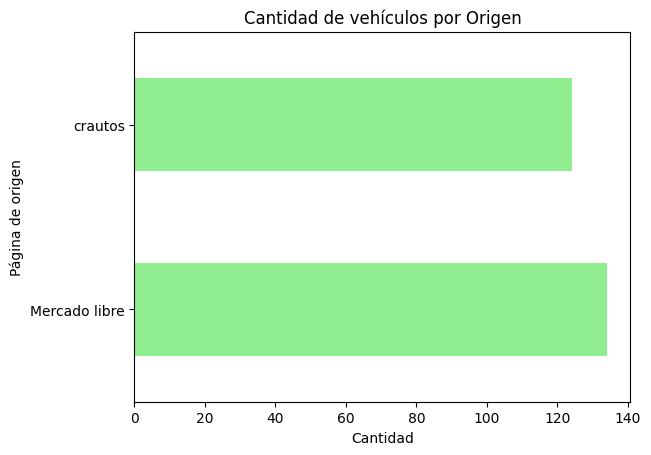

In [69]:
# Gráfico de barras horizontal que cuenta las observaciones de la columna origen
df_final['Origen'].value_counts().plot.barh(color = 'lightgreen')

# Ejes
plt.xlabel('Cantidad')
plt.ylabel('Página de origen')

# Título
plt.title('Cantidad de vehículos por Origen')

plt.show()

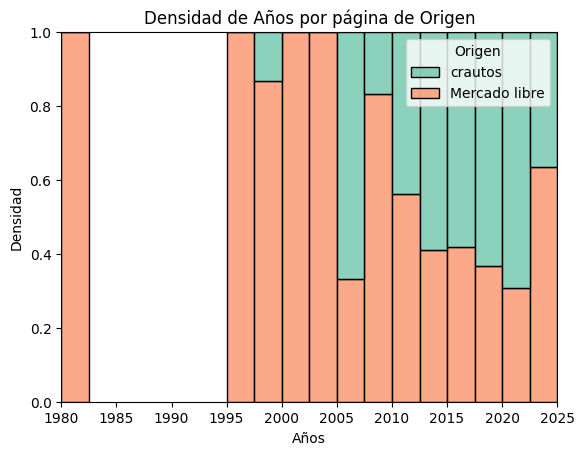

In [70]:
# Gráfico con los años en el eje x, agrupa por origen y llena con porcentajes en cada intervalo de años según el origen
sns.histplot(x = 'Años', hue = 'Origen', multiple = "fill", data = df_final, palette = "Set2")

# Ejes
plt.xlabel('Años')
plt.ylabel('Densidad')

# Título
plt.title('Densidad de Años por página de Origen')

plt.show()

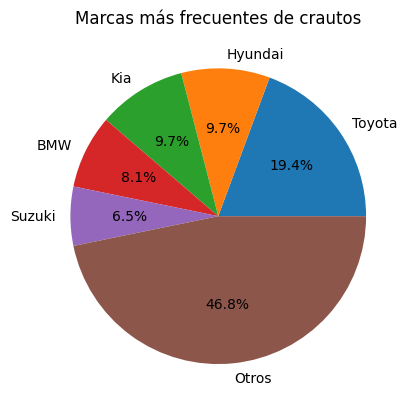

In [93]:
# Se creará un gráfico de pastel por cada categoría para ver las principales marcas
df_origen = df_final[df_final['Origen'] == 'crautos']

# Contamos la cantidad de cada una de las marcas
conteo_marcas = df_origen['Marca'].value_counts()

# Nos quedadmos con las 5 marcas más frecuentes
marcas_principales = conteo_marcas.head(5)
otras_marcas = conteo_marcas.iloc[5:]
otras_marcas = otras_marcas.sum()

# Se combinan las marcas principales y el grupo de Otros
marcas_principales['Otros'] = otras_marcas

# Gráfico
plt.figure()
plt.pie(marcas_principales, labels = marcas_principales.index, autopct = '%1.1f%%')
plt.title('Marcas más frecuentes de crautos')

# Mostrar el gráfico
plt.show()

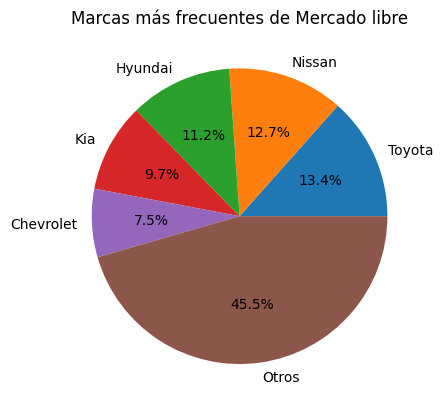

In [92]:
# Se creará un gráfico de pastel por cada categoría para ver las principales marcas
df_origen = df_final[df_final['Origen'] == 'Mercado libre']

# Contamos la cantidad de cada una de las marcas
conteo_marcas = df_origen['Marca'].value_counts()

# Nos quedadmos con las 5 marcas más frecuentes
marcas_principales = conteo_marcas.head(5)
otras_marcas = conteo_marcas.iloc[5:]
otras_marcas = otras_marcas.sum()

# Se combinan las marcas principales y el grupo de Otros
marcas_principales['Otros'] = otras_marcas

# Gráfico
plt.figure()
plt.pie(marcas_principales, labels = marcas_principales.index, autopct = '%1.1f%%')
plt.title('Marcas más frecuentes de Mercado libre')

# Mostrar el gráfico
plt.show()

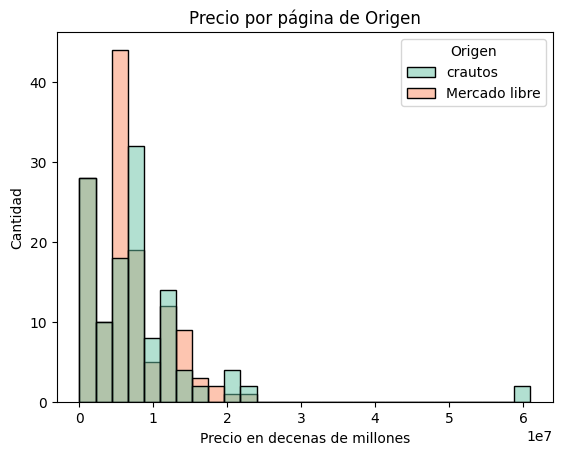

In [9]:
# Gráfico con los años en el eje x, agrupa por origen y llena con porcentajes en cada intervalo de años según el origen
sns.histplot(x = 'Precio', hue = 'Origen', data = df_final, palette = 'Set2')

# Ejes
plt.xlabel('Precio en decenas de millones')
plt.ylabel('Cantidad')

# Título
plt.title('Precio por página de Origen')

plt.show()

Para eliminar las observaciones que podrían generar problema, se tomarán los carros con valor de, al menos, 1000000.

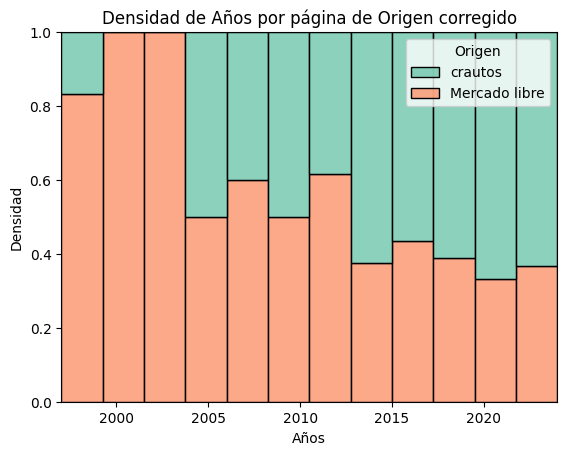

In [24]:
df_mod = df_final[df_final['Precio'] > 1_000_000]

# Gráfico con los años en el eje x, agrupa por origen y llena con porcentajes en cada intervalo de años según el origen
sns.histplot(x = 'Años', hue = 'Origen', multiple = "fill", data = df_mod, palette = "Set2")

# Ejes
plt.xlabel('Años')
plt.ylabel('Densidad')

# Título
plt.title('Densidad de Años por página de Origen corregido')

plt.show()

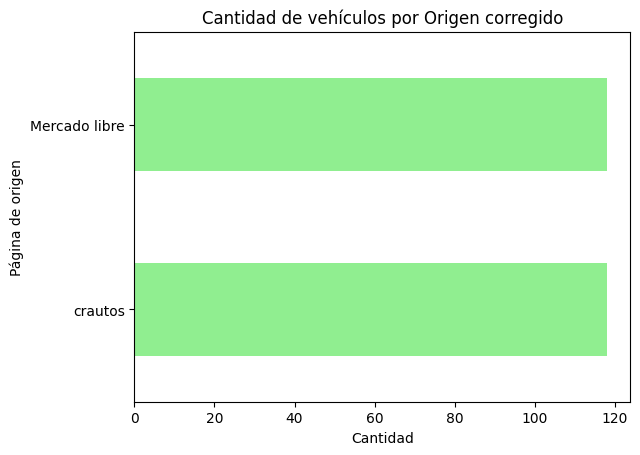

In [23]:
# Gráfico de barras horizontal que cuenta las observaciones de la columna origen
df_mod['Origen'].value_counts().plot.barh(color = 'lightgreen')

# Ejes
plt.xlabel('Cantidad')
plt.ylabel('Página de origen')

# Título
plt.title('Cantidad de vehículos por Origen corregido')

plt.show()

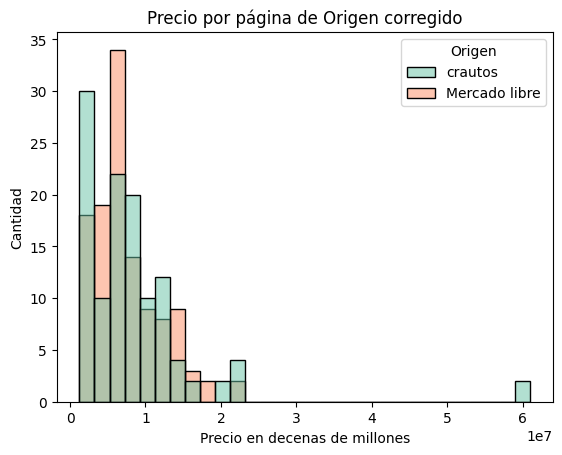

In [22]:
# Gráfico con los años en el eje x, agrupa por origen y llena con porcentajes en cada intervalo de años según el origen
sns.histplot(x = 'Precio', hue = 'Origen', data = df_mod, palette = 'Set2')

# Ejes
plt.xlabel('Precio en decenas de millones')
plt.ylabel('Cantidad')

# Título
plt.title('Precio por página de Origen corregido')

plt.show()

Los análisis de los gráficos y las tablas se desarrollan brevemente en el documento escrito y se extienden completamente en la presentación.